In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from joblib import dump
from src.models import eval_model as evm
from src.models import eval_baseline as evb
from sklearn.utils import resample
%load_ext autoreload
%autoreload 2

# Case for Upsample

In [10]:
from sklearn.model_selection import train_test_split
def read_and_split_data(file):
    df = pd.read_csv(file)
    x=df.drop(['TARGET_5Yrs','TARGET_5Yrs_Inv'],axis=1)
    y=df['TARGET_5Yrs_Inv']
    x_data , x_test ,y_data,  y_test = train_test_split(x, y, test_size=0.2, random_state = 8, stratify=y)
    x_train , x_val , y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state = 8, stratify=y_data)
    print('y',y.value_counts())
    print('y_train',y_train.value_counts())
    print('y_val', y_val.value_counts())
    print('y_test',y_test.value_counts())
    return x_train , x_val , y_train, y_val, x_test,  y_test

In [11]:
x_train , x_val , y_train, y_val, x_test,  y_test = read_and_split_data("../data/processed/df_cleaned_upsampled_nba_prediction.csv")

y 0    6669
1    6669
Name: TARGET_5Yrs_Inv, dtype: int64
y_train 0    4268
1    4268
Name: TARGET_5Yrs_Inv, dtype: int64
y_val 0    1067
1    1067
Name: TARGET_5Yrs_Inv, dtype: int64
y_test 0    1334
1    1334
Name: TARGET_5Yrs_Inv, dtype: int64


c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score:  0.5  F1 Score  0.0  Precision Score  0.0  Recall Score  0.0 (BASELINE)


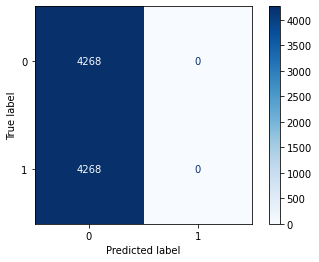

In [12]:
evb.eval_baseline(x_train,y_train)

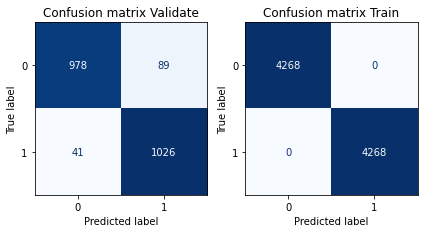

(RandomForestClassifier(random_state=8), 1.0, 0.9857644650058104)

In [13]:
evm.eval_model(RandomForestClassifier(random_state=8),x_train,y_train,x_val,y_val)

In [197]:
rf_data = [
    ['n_estimators', 5], 
    ['n_estimators', 25],
    ['n_estimators',50],
    ['n_estimators', 150],
    ['n_estimators',250],
    ['n_estimators',350],
    ['max_depth',2],
    ['max_depth',6],
    ['max_depth',12],
    ['max_depth',25],
    ['max_depth',50],
    ['min_samples_leaf',1],
    ['min_samples_leaf',2],
    ['min_samples_leaf',3],
    ['min_samples_leaf',5],
    ['min_samples_leaf',10],
    ['min_samples_leaf',15],
    ['min_samples_leaf',50],
    ['max_features',2],
    ['max_features',5],
    ['max_features',10],
    ['max_features',15]
    
]
rf_data

[['n_estimators', 5],
 ['n_estimators', 25],
 ['n_estimators', 50],
 ['n_estimators', 150],
 ['n_estimators', 250],
 ['n_estimators', 350],
 ['max_depth', 2],
 ['max_depth', 6],
 ['max_depth', 12],
 ['max_depth', 25],
 ['max_depth', 50],
 ['min_samples_leaf', 1],
 ['min_samples_leaf', 2],
 ['min_samples_leaf', 3],
 ['min_samples_leaf', 5],
 ['min_samples_leaf', 10],
 ['min_samples_leaf', 15],
 ['min_samples_leaf', 50],
 ['max_features', 2],
 ['max_features', 5],
 ['max_features', 10],
 ['max_features', 15]]

In [199]:
rf_param = pd.DataFrame(rf_data, columns = ['param', 'value']) 
rf_param

,param,value
0,n_estimators,5
1,n_estimators,25
2,n_estimators,50
3,n_estimators,150
4,n_estimators,250
5,n_estimators,350
6,max_depth,2
7,max_depth,6
8,max_depth,12
9,max_depth,25


# Training is overfitting. Tunning parameter starting with n_estimators

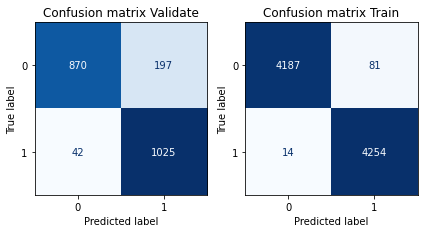

RandomForestClassifier(n_estimators=5, random_state=8)


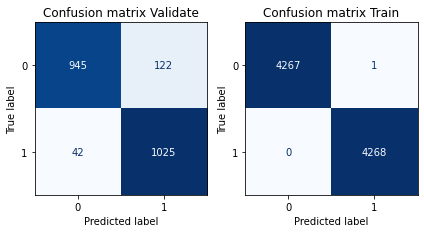

RandomForestClassifier(n_estimators=25, random_state=8)


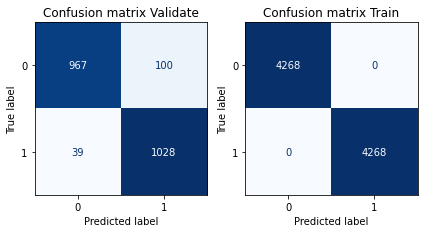

RandomForestClassifier(n_estimators=50, random_state=8)


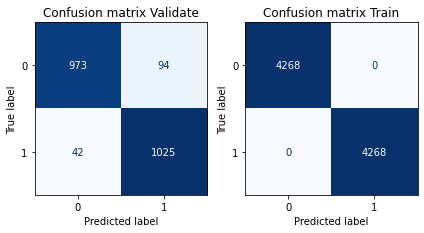

RandomForestClassifier(n_estimators=150, random_state=8)


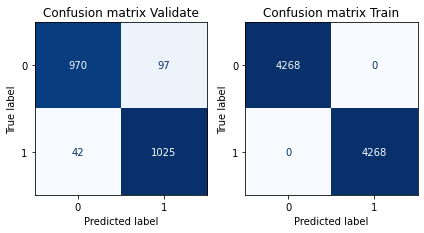

RandomForestClassifier(n_estimators=250, random_state=8)


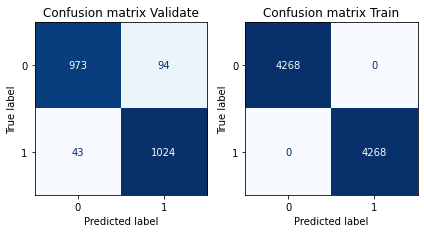

RandomForestClassifier(n_estimators=350, random_state=8)


In [191]:
for _,row in rf_param[rf_param['param']=='n_estimators'].iterrows():
    evm.eval_model(RandomForestClassifier(random_state=8,n_estimators = int(row.value)) ,x_train,y_train,x_val,y_val)

# Taking n_estimators = 50, tunning max_depth

In [193]:
nestimator = 50

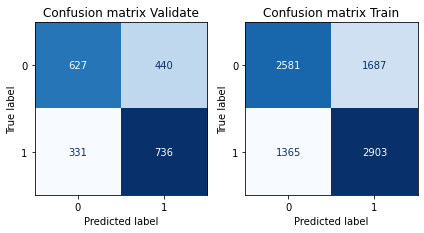

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=8)


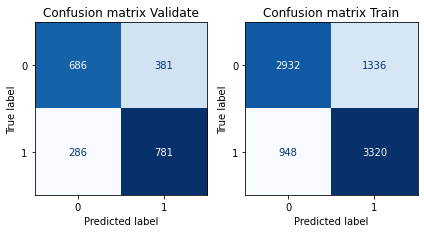

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=8)


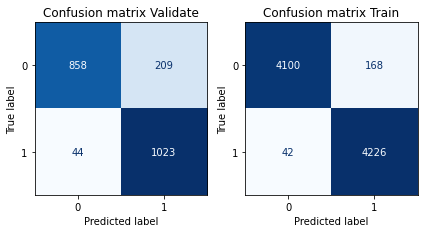

RandomForestClassifier(max_depth=12, n_estimators=50, random_state=8)


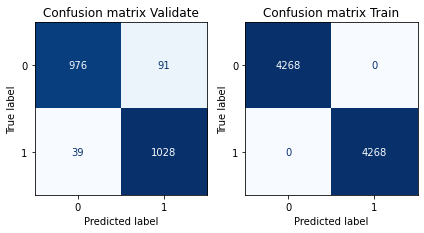

RandomForestClassifier(max_depth=25, n_estimators=50, random_state=8)


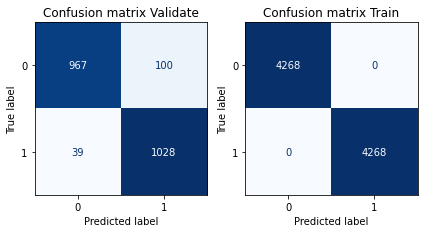

RandomForestClassifier(max_depth=50, n_estimators=50, random_state=8)


In [194]:
for _,row in rf_param[rf_param['param']=='max_depth'].iterrows():
    evm.eval_model(RandomForestClassifier(random_state=8,n_estimators = nestimator, max_depth= int(row.value)) ,x_train,y_train,x_val,y_val)

# Taking max_depth = 25, tunning min_samples_leaf

In [195]:
maxdepth = 25

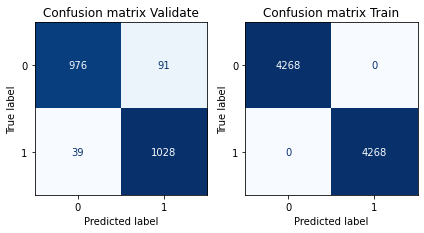

RandomForestClassifier(max_depth=25, n_estimators=50, random_state=8)


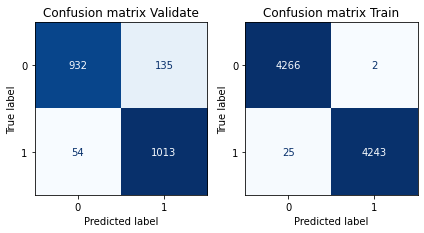

RandomForestClassifier(max_depth=25, min_samples_leaf=2, n_estimators=50,
                       random_state=8)


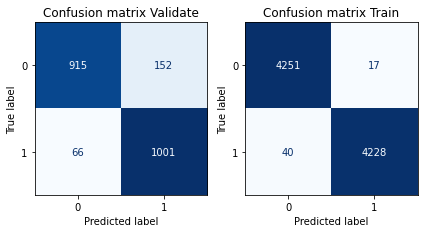

RandomForestClassifier(max_depth=25, min_samples_leaf=3, n_estimators=50,
                       random_state=8)


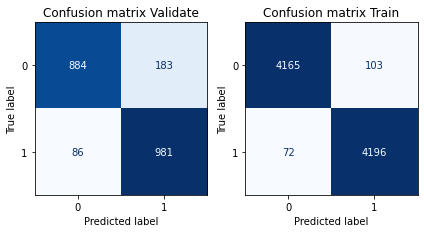

RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=50,
                       random_state=8)


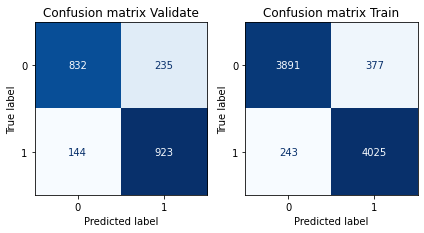

RandomForestClassifier(max_depth=25, min_samples_leaf=10, n_estimators=50,
                       random_state=8)


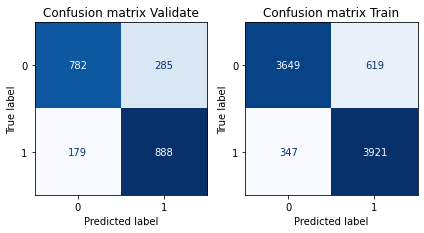

RandomForestClassifier(max_depth=25, min_samples_leaf=15, n_estimators=50,
                       random_state=8)


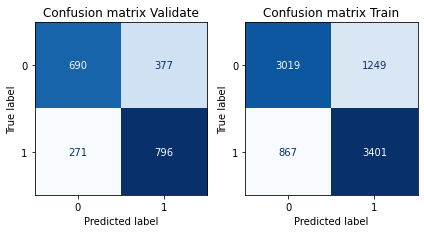

RandomForestClassifier(max_depth=25, min_samples_leaf=50, n_estimators=50,
                       random_state=8)


In [200]:
for _,row in rf_param[rf_param['param']=='min_samples_leaf'].iterrows():
    evm.eval_model(RandomForestClassifier(random_state=8,n_estimators =nestimator, max_depth=maxdepth,min_samples_leaf = int(row.value)) ,x_train,y_train,x_val,y_val)

# Taking min_samples_leaf = 1, Tunning max_features

In [201]:
minsamplesleaf=1

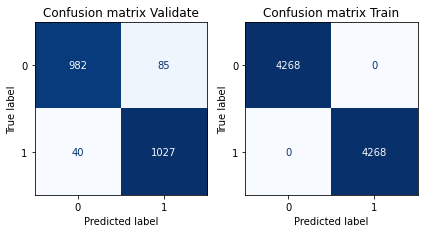

RandomForestClassifier(max_depth=25, max_features=2, n_estimators=50,
                       random_state=8)


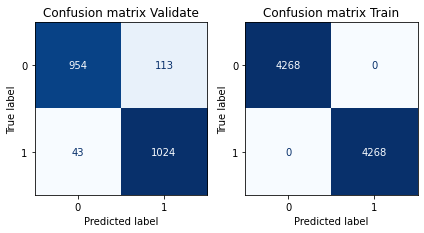

RandomForestClassifier(max_depth=25, max_features=5, n_estimators=50,
                       random_state=8)


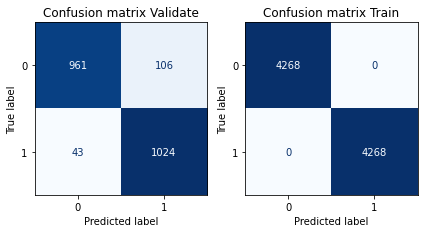

RandomForestClassifier(max_depth=25, max_features=10, n_estimators=50,
                       random_state=8)


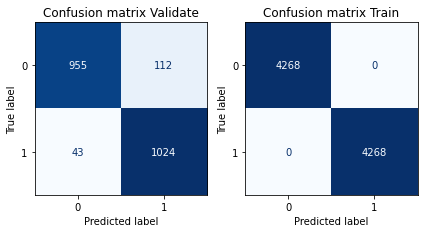

RandomForestClassifier(max_depth=25, max_features=15, n_estimators=50,
                       random_state=8)


In [203]:
for _,row in rf_param[rf_param['param']=='max_features'].iterrows():
    evm.eval_model(RandomForestClassifier(random_state=8,n_estimators=nestimator,max_depth=maxdepth,min_samples_leaf=minsamplesleaf,max_features = int(row.value)) ,x_train,y_train,x_val,y_val)

# Taking max_feature = 2, now using hyperopt to see if it can get better

In [207]:
maxfeatures=2

In [210]:
print('max_depth=',maxdepth,' max_features=',maxfeatures, ' min_samples_leaf=',minsamplesleaf,' n_estimators=',nestimator)

max_depth= 25  max_features= 2  min_samples_leaf= 1  n_estimators= 50


(0.9861912184837117,
 0.9426536731634183,
 0.9443838604143947,
 0.9167254763585039,
 0.9737631184407796,
 0.9426536731634183)

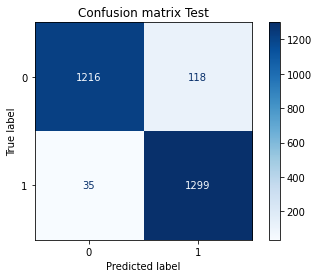

In [243]:
rf_upsample_mod0 = RandomForestClassifier(random_state=8,n_estimators=nestimator,max_depth=maxdepth,min_samples_leaf=minsamplesleaf,max_features = maxfeatures)
evm.get_performance(rf_upsample_mod, x_test, y_test, "Test", True)

In [211]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score , cross_validate 
space = {
    'max_depth': hp.choice('max_depth',range(1,100,1)),
    'max_features': hp.choice('max_features',range(1,15,1)),
    'min_samples_leaf': hp.choice('min_samples_leaf',range(1,14,1)),
    'n_estimators':  hp.choice('n_estimators',range(10,500,1))
}
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x1fd3eaa9130>,
 'max_features': <hyperopt.pyll.base.Apply at 0x1fd3ea34b20>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x1fd3ea344c0>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x1fd17e7a1f0>}

In [212]:
def objective(space):
   rf = RandomForestClassifier(max_depth = space['max_depth'],max_features = space['max_features'],min_samples_leaf = space['min_samples_leaf'],n_estimators = space['n_estimators'])
   acc=cross_val_score(rf, x_train,y_train,cv=50, scoring='roc_auc').mean()
   return{'loss': 1-acc, 'status': STATUS_OK }
best = fmin(
   fn=objective,  
   space=space,      
   algo=tpe.suggest,      
   max_evals=5
)

100%|███████████████████████████████████████████████| 5/5 [14:35<00:00, 175.02s/trial, best loss: 0.014015836485072652]


In [216]:
best

{'max_depth': 40,
 'max_features': 11,
 'min_samples_leaf': 0,
 'n_estimators': 61}

# Validate Results form Hyperopt

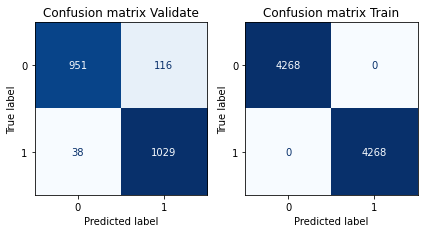

RandomForestClassifier(max_depth=40, max_features=11, n_estimators=61,
                       random_state=8)


(RandomForestClassifier(max_depth=40, max_features=11, n_estimators=61,
                        random_state=8),
 1.0,
 0.9833252670864628)

In [217]:
rf_upsample_mod = RandomForestClassifier(random_state=8,n_estimators = best['n_estimators'], max_depth = best['max_depth'], max_features = best['max_features'])
evm.eval_model(rf_upsample_mod,x_train,y_train,x_val,y_val)

(0.9861912184837117,
 0.9426536731634183,
 0.9443838604143947,
 0.9167254763585039,
 0.9737631184407796,
 0.9426536731634183)

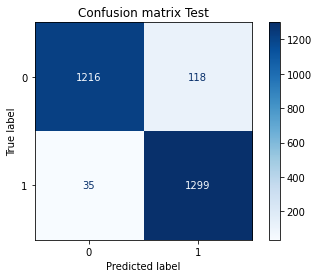

In [218]:
evm.get_performance(rf_upsample_mod, x_test, y_test, "Test", True)

In [237]:
#max_depth= 25  max_features= 2  min_samples_leaf= 1  n_estimators= 50
space = {
    'max_depth': hp.choice('max_depth',range(1,30,1)),
    'max_features': hp.choice('max_features',range(1,15,1)),
    'min_samples_leaf': hp.choice('min_samples_leaf',range(1,14,1)),
    'n_estimators':  hp.choice('n_estimators',range(10,250,1))
}
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x1fd3d9565e0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x1fd3d956f70>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x1fd3e9c4850>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x1fd3e9c4400>}

In [239]:
def objective(space):
   rf = RandomForestClassifier(max_depth = space['max_depth'],max_features = space['max_features'],min_samples_leaf = space['min_samples_leaf'],n_estimators = space['n_estimators'])
   acc=cross_val_score(rf, x_train,y_train,cv=50, scoring='roc_auc').mean()
   return{'loss': 1-acc, 'status': STATUS_OK }
best = fmin(
   fn=objective,  
   space=space,      
   algo=tpe.suggest,      
   max_evals=5
)
best

100%|████████████████████████████████████████████████| 5/5 [05:23<00:00, 64.62s/trial, best loss: 0.026377597167458022]


{'max_depth': 17,
 'max_features': 3,
 'min_samples_leaf': 2,
 'n_estimators': 112}

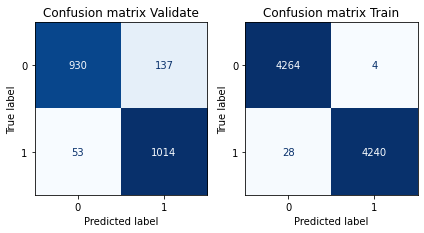

RandomForestClassifier(max_depth=17, max_features=3, min_samples_leaf=2,
                       n_estimators=112, random_state=8)


(RandomForestClassifier(max_depth=17, max_features=3, min_samples_leaf=2,
                        n_estimators=112, random_state=8),
 0.9999312136524816,
 0.9767525202263702)

In [240]:
rf_upsample_mod1 = RandomForestClassifier(random_state=8,n_estimators = best['n_estimators'], max_depth = best['max_depth'], max_features = best['max_features'], min_samples_leaf = best['min_samples_leaf'])
evm.eval_model(rf_upsample_mod1,x_train,y_train,x_val,y_val)

(0.9813284886791986,
 0.9209145427286357,
 0.9233563385397748,
 0.8957011980267794,
 0.9527736131934033,
 0.9209145427286357)

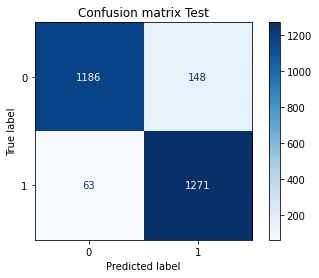

In [242]:
evm.get_performance(rf_upsample_mod1, x_test, y_test, "Test", True)

# Predict for Upsample

In [233]:
def read_and_split_data(file):
    df = pd.read_csv(file)
    df_cleaned = df.copy()
    print('Before Data Clean')
    for cols in df_cleaned.columns:
        chk_rows = df_cleaned[df_cleaned[cols]<0].shape[0]
        if chk_rows > 0 :
            print(f'Column Name {cols},\tRows with Negative Value {chk_rows},\tPercentage {chk_rows/len(df)*100}')
    df_cleaned[ df_cleaned<0 ] = 0
    df_cleaned.loc[df_cleaned['3P Made'] <= 0, ['3P Made', '3PA', 'CALC3P%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FGM'] <= 0, ['FGM', 'FGA', 'CALCFG%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FTM'] <= 0, ['FTM', 'FTA', 'CALCFT%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['3P Made'] > df_cleaned['3PA'], ['3P Made' , '3PA', 'CALC3P%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FGM'] > df_cleaned['FGA'], ['FGM', 'FGA', 'CALCFG%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FTM'] > df_cleaned['FTA'], ['FTM', 'FTA', 'CALCFT%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['3P Made'] > 0, ['CALC3P%']] = df_cleaned['3P Made']/df_cleaned['3PA']*100
    df_cleaned.loc[df_cleaned['FGM'] > 0, ['CALCFG%']] =df_cleaned['FGM']/df_cleaned['FGA']*100
    df_cleaned.loc[df_cleaned['FTM'] > 0, ['CALCFT%']] = df_cleaned['FTM']/df_cleaned['FTA']*100
    print(df_cleaned.head(5))
    print('After Data Clean')
    for cols in df_cleaned.columns:
        chk_rows = df_cleaned[df_cleaned[cols]<0].shape[0]
        if chk_rows > 0 :
            print(f'Column Name {cols},\tRows with Negative Value {chk_rows},\tPercentage {chk_rows/len(df)*100}')
    x = df_cleaned.drop(['3P%','FT%','FG%','Id_old','Id'],axis=1)
    print(df_cleaned.columns)
    return x , df_cleaned

In [234]:
x, df_cleaned =read_and_split_data('../data/raw/test.csv')

Before Data Clean
Column Name 3P Made,	Rows with Negative Value 775,	Percentage 20.400105290866016
Column Name 3PA,	Rows with Negative Value 773,	Percentage 20.34745985785733
Column Name 3P%,	Rows with Negative Value 435,	Percentage 11.450381679389313
Column Name BLK,	Rows with Negative Value 456,	Percentage 12.003158725980521
   Id_old  Id  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  OREB  DREB  \
0       1   0  56   9.1   4.0  1.6   3.7  43.7      0.1  0.3  ...   1.2   0.8   
1    8194   1  43  19.3  10.1  3.7   8.1  46.0      0.6  1.7  ...   0.5   0.9   
2       3   2  82  33.9  11.3  4.9  10.6  45.6      0.5  1.9  ...   1.3   3.3   
3    8196   3  86  44.7  18.8  6.8  15.9  42.9      0.5  1.8  ...   1.5   3.2   
4    8197   4  58  12.3   4.7  1.6   4.0  40.0      0.5  1.7  ...   0.2   0.6   

   REB  AST  STL  BLK  TOV    CALC3P%    CALCFG%    CALCFT%  
0  1.7  0.4  0.2  0.3  0.8  33.333333  43.243243  58.333333  
1  1.5  3.5  0.6  0.0  1.8  35.294118  45.679012  72.000000 

In [225]:
y_upsample_pred_proba=rf_upsample_mod.predict_proba(x)
y_upsample_pred=rf_upsample_mod.predict(x)

In [226]:
print(np.unique(y_upsample_pred_proba,return_counts=True))
print(np.unique(y_upsample_pred,return_counts=True))

(array([0.        , 0.01639344, 0.03278689, 0.04918033, 0.06557377,
       0.08196721, 0.09836066, 0.1147541 , 0.13114754, 0.14754098,
       0.16393443, 0.18032787, 0.19672131, 0.21311475, 0.2295082 ,
       0.24590164, 0.26229508, 0.27868852, 0.29508197, 0.31147541,
       0.32786885, 0.3442623 , 0.36065574, 0.37704918, 0.39344262,
       0.40983607, 0.42622951, 0.44262295, 0.45901639, 0.47540984,
       0.49180328, 0.50819672, 0.52459016, 0.54098361, 0.55737705,
       0.57377049, 0.59016393, 0.60655738, 0.62295082, 0.63934426,
       0.6557377 , 0.67213115, 0.68852459, 0.70491803, 0.72131148,
       0.73770492, 0.75409836, 0.7704918 , 0.78688525, 0.80327869,
       0.81967213, 0.83606557, 0.85245902, 0.86885246, 0.8852459 ,
       0.90163934, 0.91803279, 0.93442623, 0.95081967, 0.96721311,
       0.98360656, 1.        ]), array([ 34,  65,  72,  87,  95,  96, 128, 116, 118, 124, 150, 130, 134,
       141, 104, 165, 155, 136, 133, 132, 150, 145, 134, 132, 149, 124,
       140, 131, 1

In [228]:
print(rf_upsample_mod.classes_)

[0 1]


In [235]:
df_cleaned_upsample_result = df_cleaned.copy()
df_cleaned_upsample_result['TARGET_5Yrs'] = y_upsample_pred_proba[:,0]
print(df_cleaned_upsample_result['TARGET_5Yrs'].round().value_counts())

1.0    3364
0.0     435
Name: TARGET_5Yrs, dtype: int64


In [236]:
df_cleaned_upsample_result.to_csv('../data/processed/TestResult_RF_UpSampleUpdated_Result.csv',index=False,columns=['Id', 'TARGET_5Yrs'])

In [241]:
y_upsample_pred_proba=rf_upsample_mod1.predict_proba(x)
y_upsample_pred=rf_upsample_mod.predict(x)
print(np.unique(y_upsample_pred,return_counts=True))
df_cleaned_upsample_result = df_cleaned.copy()
df_cleaned_upsample_result['TARGET_5Yrs'] = y_upsample_pred_proba[:,0]
print(df_cleaned_upsample_result['TARGET_5Yrs'].round().value_counts())
df_cleaned_upsample_result.to_csv('../data/processed/TestResult_RF_UpSampleUpdated_Result.csv',index=False,columns=['Id', 'TARGET_5Yrs'])

(array([0, 1], dtype=int64), array([3364,  435], dtype=int64))
1.0    3308
0.0     491
Name: TARGET_5Yrs, dtype: int64
